## Caso de análisis:
Al día siguiente, presentamos los resultados anteriores al equipo y obtenemos el VoBo para continuar. Efectivamente, lo obtenido hasta el momento hace sentido, y lo importante es que ya se cuenta con un corpus de comentarios limpio y se tiene un vocabulario resumido. Alguien del equipo expresa que ya se puede aplicar, entonces, un modelo para clasificación, por lo que -con todo la razón- argumentamos que primero se debe obtener una representación vectorial del corpus, y justamente es lo que se pondrá en foco a continuación.

## Consignas

1. Representación vectorial: en esta parte, se debe aplicar un modelo de representación vectorial. Se recomienda el uso de TfidfVectorizer por sobre una representación BoW debido a que facilita la inclusión de los emojis, tal como se expone en el siguiente ejemplo:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(token_pattern='[^\s]+')
tfidf_X_train = tfidf.fit_transform(X_train)

El modelo para la vectorización debe ajustarse primero con los datos X de entrenamiento y, posteriormente, realizar la transformación con los datos X de testeo:
tfidf_X_test = tfidf.transform(X_test)






Resolución:
mantenemos el código del API2, para mantener los datos calculados

1) Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

2) limpieza y tokenización

In [3]:
import re

def limpiar_tokenizar(texto):
  texto = texto.lower()
  tokenizer = RegexpTokenizer(r'[^\s^,^.^;]+')
  tokens = tokenizer.tokenize(texto)
  return tokens
  texto = 'vi viene última . fff , ❤ 🥰 :)'
  tokens = limpiar_tokenizar(texto)
  print(tokens)


b. lemantización y stemming

In [4]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

# función para lemantizar
def lematizar(tokens):
  lemmatizer = WordNetLemmatizer()
  lemas = [lemmatizer.lemmatize(token) for token in tokens]
  return lemas

# función para stemming
def stemming(tokens):
  stemmer = PorterStemmer()
  raices = [stemmer.stem(token) for token in tokens]
  return raices

ejemplos:

In [5]:
data ={
    'texto':[
        "Este es un buen ejemplo.",
        "Este es un mal ejemplo.",
        "Este es un ejemplo informativo.",
        "comentario adicional",
        "comentario malo",
        "comentario bueno"
    ],
    'target':['bueno', 'malo', 'info', 'adicional', 'malo', 'bueno']
}
df = pd.DataFrame(data)
df['tokens'] = df['texto'].apply(limpiar_tokenizar)
df['lemas'] = df['tokens'].apply(lematizar)
df['raices'] = df['tokens'].apply(stemming)

print(df[['lemas','texto','tokens', 'raices']])

                                 lemas                            texto  \
0         [este, e, un, buen, ejemplo]         Este es un buen ejemplo.   
1          [este, e, un, mal, ejemplo]          Este es un mal ejemplo.   
2  [este, e, un, ejemplo, informativo]  Este es un ejemplo informativo.   
3              [comentario, adicional]             comentario adicional   
4                   [comentario, malo]                  comentario malo   
5                  [comentario, bueno]                 comentario bueno   

                                 tokens                               raices  
0         [este, es, un, buen, ejemplo]         [est, es, un, buen, ejemplo]  
1          [este, es, un, mal, ejemplo]          [est, es, un, mal, ejemplo]  
2  [este, es, un, ejemplo, informativo]  [est, es, un, ejemplo, informativo]  
3               [comentario, adicional]                [comentario, adicion]  
4                    [comentario, malo]                   [comentario, malo]  


3) split de la muestra

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
print("Entrenamiento:")
print(train)
print("Prueba:")
print(test)

Entrenamiento:
                             texto     target  \
5                 comentario bueno      bueno   
2  Este es un ejemplo informativo.       info   
4                  comentario malo       malo   
3             comentario adicional  adicional   

                                 tokens                                lemas  \
5                   [comentario, bueno]                  [comentario, bueno]   
2  [este, es, un, ejemplo, informativo]  [este, e, un, ejemplo, informativo]   
4                    [comentario, malo]                   [comentario, malo]   
3               [comentario, adicional]              [comentario, adicional]   

                                raices  
5                  [comentario, bueno]  
2  [est, es, un, ejemplo, informativo]  
4                   [comentario, malo]  
3                [comentario, adicion]  
Prueba:
                      texto target                         tokens  \
0  Este es un buen ejemplo.  bueno  [este, es, un, buen,

4) target

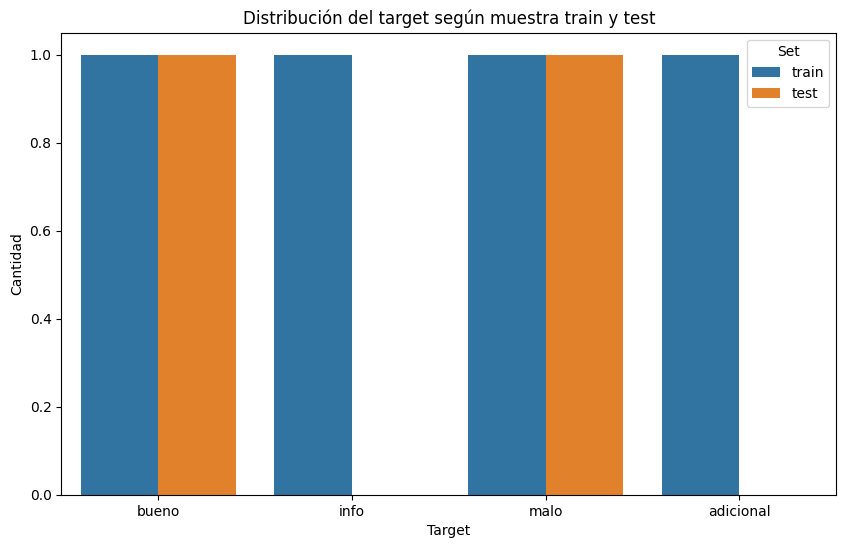

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

train['set'] = 'train'
test['set'] = 'test'
df_all = pd.concat([train, test])

# gráfica
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='set', data=df_all)
plt.title('Distribución del target según muestra train y test')
plt.xlabel('Target')
plt.ylabel('Cantidad')
plt.legend(title='Set')
plt.show()

## Desarrollo API3 - NPL

importamos librerias

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer


Definimos las variables para entrenamiento

In [9]:
X_train = train['texto']
X_test = test['texto']
y_train = train['target']
y_test = test['target']

Generamos el modelo tfidfVectorizer, que aplica el token_pattter para incluir los emojis

In [10]:
tfidf = TfidfVectorizer(token_pattern='[^\s]+')

Se ajusta el modelo con los datos de entrenamiento

In [11]:
tfidf_X_train = tfidf.fit_transform(X_train)

transformar datos

In [12]:
tfidf_X_test = tfidf.transform(X_test)

Mostramos las matrices resultantes

In [13]:
print("Dimensiones del conjunto de entrenamiento: ", tfidf_X_train.shape)
print("Dimensiones del conjunto de prueba: ", tfidf_X_test.shape)

Dimensiones del conjunto de entrenamiento:  (4, 9)
Dimensiones del conjunto de prueba:  (2, 9)


Obtener las caracteristicas (tokens)

In [15]:
feature_names = tfidf.get_feature_names_out()

convertir la matriz tfidf_X_train en dataframe

In [16]:
tfidf_df = pd.DataFrame(tfidf_X_train.toarray(), columns=feature_names)

convertir tfidf_X_test en dataframe

In [17]:
tfidf_df_test = pd.DataFrame(tfidf_X_test.toarray(), columns=feature_names)

Visualizar dataframe

In [18]:
print("Matriz tfidf_X_train")
print(tfidf_df.head())

Matriz tfidf_X_train
   adicional     bueno  comentario   ejemplo        es      este  \
0   0.000000  0.842926    0.538029  0.000000  0.000000  0.000000   
1   0.000000  0.000000    0.000000  0.447214  0.447214  0.447214   
2   0.000000  0.000000    0.538029  0.000000  0.000000  0.000000   
3   0.842926  0.000000    0.538029  0.000000  0.000000  0.000000   

   informativo.      malo        un  
0      0.000000  0.000000  0.000000  
1      0.447214  0.000000  0.447214  
2      0.000000  0.842926  0.000000  
3      0.000000  0.000000  0.000000  


In [19]:
print("Matriz tfidf_X_test")
print(tfidf_df_test.head())

Matriz tfidf_X_test
   adicional  bueno  comentario  ejemplo       es     este  informativo.  \
0        0.0    0.0         0.0      0.0  0.57735  0.57735           0.0   
1        0.0    0.0         0.0      0.0  0.57735  0.57735           0.0   

   malo       un  
0   0.0  0.57735  
1   0.0  0.57735  
